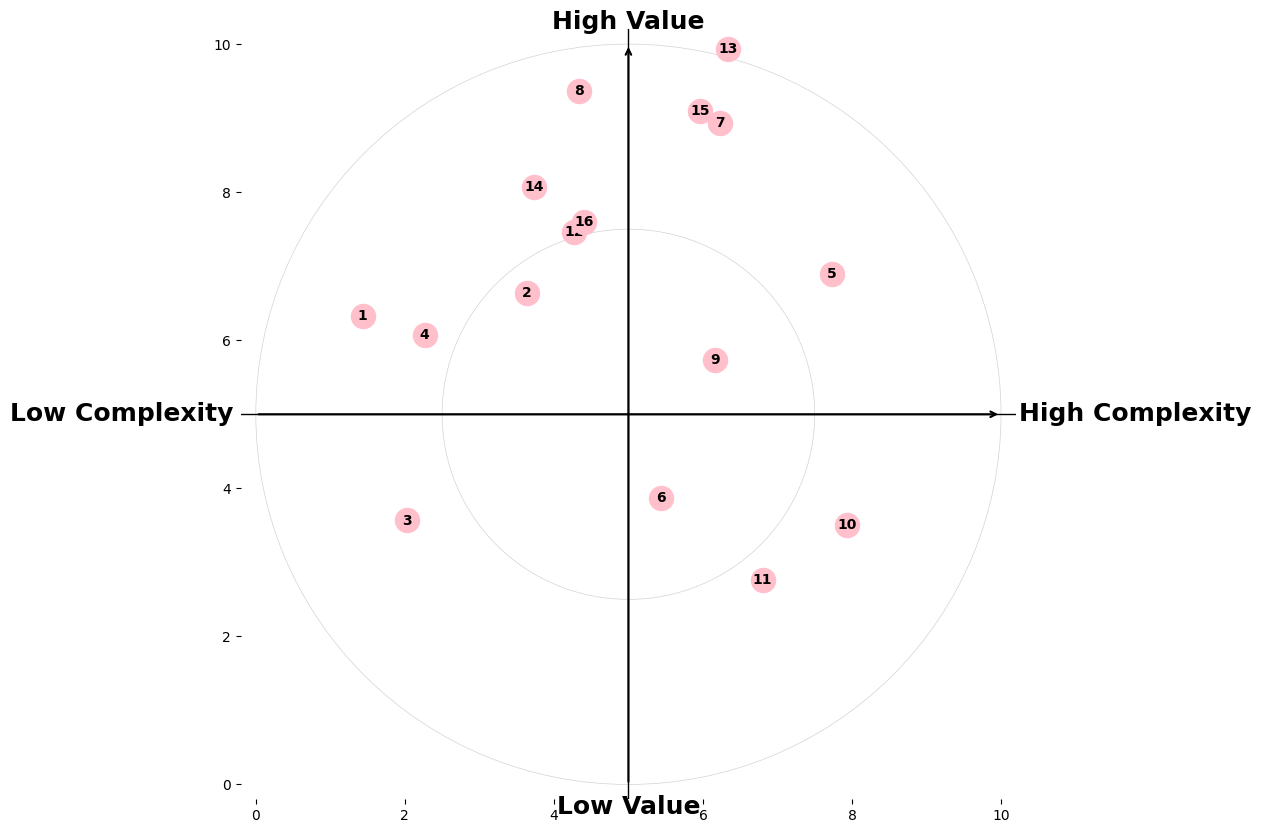

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Define groups, colors, and average color
group_colors = {"Group 1": "blue", "Group 2": "green", "Group 3": "red"}
average_color = "pink"  # Set average points color to pink
group_names = list(group_colors.keys())
num_solutions = 16  # Fixed number of solutions, labeled 1 to 16

def calculate_average_points(all_groups_points, selected_groups):
    """Calculate average complexity and value for each solution across selected groups."""
    average_points = {}
    point_counts = {i: 0 for i in range(1, num_solutions + 1)}
    
    for group in selected_groups:
        group_points = all_groups_points[group]
        for label, coords in group_points.items():
            x, y = coords
            if label not in average_points:
                average_points[label] = [0, 0]
            average_points[label][0] += x
            average_points[label][1] += y
            point_counts[label] += 1
    
    # Calculate the average for each solution
    for label, coords in average_points.items():
        count = point_counts[label]
        average_points[label] = [coord / count for coord in coords]
    
    return average_points

def plot_points_on_styled_grid(csv_file, selected_groups, show_average=False, hide_groups=False):
    # Load data from CSV file
    df = pd.read_csv(csv_file)
    
    # Convert the DataFrame to the required nested dictionary format
    all_groups_points = {
        group: {
            int(solution): [row["Complexity"], row["Value"]]
            for solution, row in group_df.groupby("Solution").first().iterrows()
        }
        for group, group_df in df.groupby("Group")
    }
    
    # Set up the plot with a larger figure size
    fig, ax = plt.subplots(figsize=(10, 10))  # Increased size for a larger view
    ax.set_xlim(-0.2, 10.2)
    ax.set_ylim(-0.2, 10.2)

    # Remove the box frame around the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Move x and y axes to the center
    ax.axhline(5, color='black', linewidth=1, zorder=1)
    ax.axvline(5, color='black', linewidth=1, zorder=1)

    # Add arrows to the axes
    ax.annotate('', xy=(10, 5), xytext=(0, 5), arrowprops=dict(arrowstyle="->", color='black', lw=1.5), zorder=1)
    ax.annotate('', xy=(5, 10), xytext=(5, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1.5), zorder=1)

    # Label axes with 'High' and 'Low' indicators
    ax.text(11.8, 5, 'High Complexity', ha='center', va='center', fontsize=18, fontweight='bold')
    ax.text(-1.8, 5, 'Low Complexity', ha='center', va='center', fontsize=18, fontweight='bold')
    ax.text(5, 10.3, 'High Value', ha='center', va='center', fontsize=18, fontweight='bold')
    ax.text(5, -0.3, 'Low Value', ha='center', va='center', fontsize=18, fontweight='bold')

    # Draw concentric circles for radial axes
    for radius in [2.5, 5]:
        circle = plt.Circle((5, 5), radius, color='lightgray', fill=False, linewidth=0.5, zorder=0)
        ax.add_artist(circle)

    # Plot each selected group's points with its assigned color if not hiding
    if not hide_groups or not show_average:
        for group in selected_groups:
            color = group_colors.get(group, "gray")
            if group in all_groups_points:
                for label, coords in all_groups_points[group].items():
                    x, y = coords
                    # Plot square points with a higher zorder so they appear above the grid lines
                    ax.scatter(x, y, color=color, s=300, marker='s', zorder=2)
                    # Overlay the label on top of the square point
                    ax.text(x, y, str(label), color='white', fontsize=10, ha='center', va='center', zorder=3, fontweight="bold")

    # Plot average points if show_average is True
    if show_average:
        average_points = calculate_average_points(all_groups_points, selected_groups)
        for label, coords in average_points.items():
            x, y = coords
            ax.scatter(x, y, color=average_color, s=300, marker='o', zorder=3)
            ax.text(x, y, str(label), color='black', fontsize=10, ha='center', va='center', fontweight='bold')

    plt.show()

# Example usage
plot_points_on_styled_grid("../group_data.csv", selected_groups=["Group 1", "Group 2", "Group 3"], show_average=True, hide_groups=True)


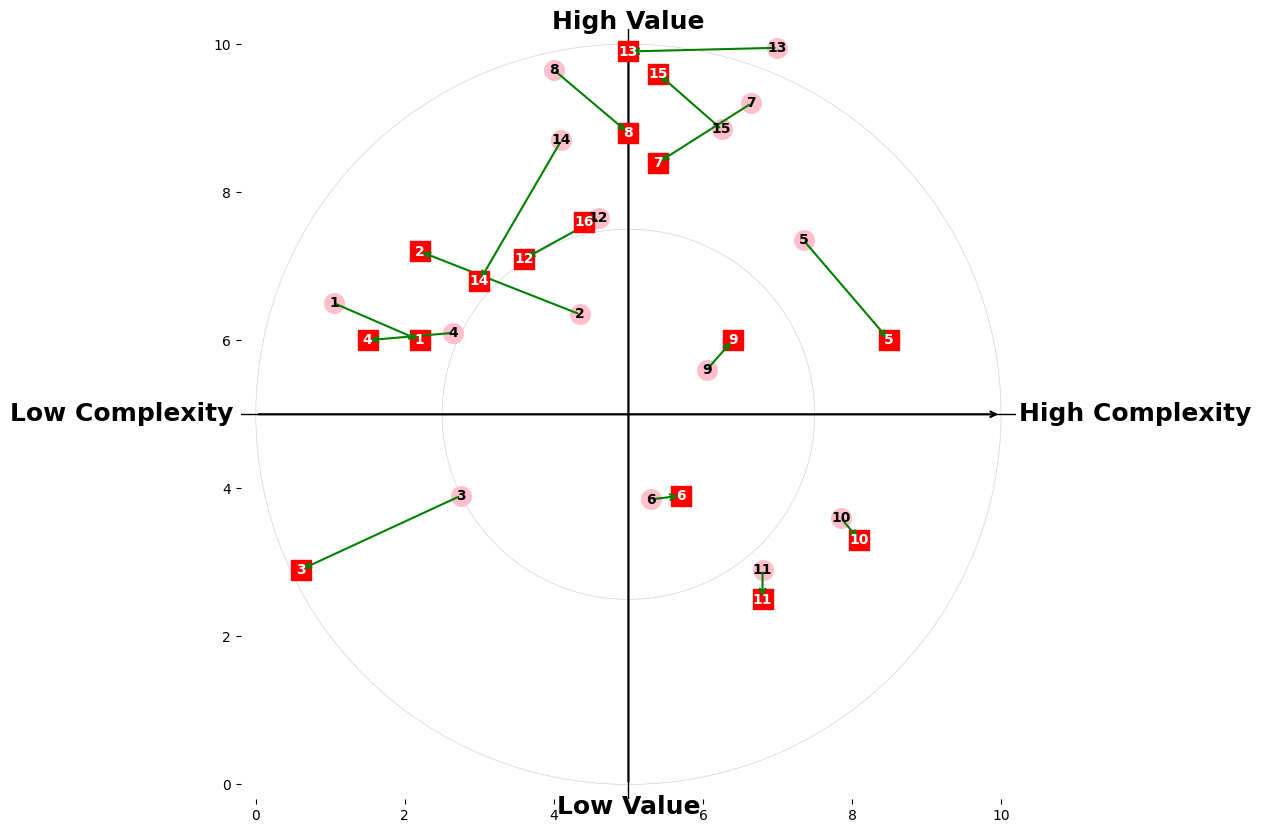

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Define groups, colors, and average color
group_colors = {"Group 1": "blue", "Group 2": "green", "Group 3": "red"}
average_color = "pink"  # Color to show average of Group 1 & Group 2
change_arrow_color = "green"  # Color for arrows showing change from avg(1&2) to Group 3
group_names = list(group_colors.keys())
num_solutions = 16  # Fixed number of solutions, labeled 1 to 16

def calculate_group_average(all_groups_points, groups_to_average):
    """Calculate the average complexity and value for each solution across specific groups."""
    average_points = {}
    point_counts = {i: 0 for i in range(1, num_solutions + 1)}
    
    for group in groups_to_average:
        group_points = all_groups_points[group]
        for label, coords in group_points.items():
            x, y = coords
            if label not in average_points:
                average_points[label] = [0, 0]
            average_points[label][0] += x
            average_points[label][1] += y
            point_counts[label] += 1
    
    # Calculate the average for each solution
    for label, coords in average_points.items():
        count = point_counts[label]
        average_points[label] = [coord / count for coord in coords]
    
    return average_points

def plot_comparison(csv_file, group1_2_average_groups=["Group 1", "Group 2"], comparison_group="Group 3"):
    # Load data from CSV file
    df = pd.read_csv(csv_file)
    
    # Convert the DataFrame to the required nested dictionary format
    all_groups_points = {
        group: {
            int(solution): [row["Complexity"], row["Value"]]
            for solution, row in group_df.groupby("Solution").first().iterrows()
        }
        for group, group_df in df.groupby("Group")
    }
    
    # Calculate the average for Group 1 and Group 2
    group1_2_average = calculate_group_average(all_groups_points, group1_2_average_groups)
    
    # Set up the plot with a larger figure size
    fig, ax = plt.subplots(figsize=(10, 10))  # Increased size for a larger view
    ax.set_xlim(-0.2, 10.2)
    ax.set_ylim(-0.2, 10.2)

    # Remove the box frame around the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Move x and y axes to the center
    ax.axhline(5, color='black', linewidth=1, zorder=1)
    ax.axvline(5, color='black', linewidth=1, zorder=1)

    # Add arrows to the axes
    ax.annotate('', xy=(10, 5), xytext=(0, 5), arrowprops=dict(arrowstyle="->", color='black', lw=1.5), zorder=1)
    ax.annotate('', xy=(5, 10), xytext=(5, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1.5), zorder=1)

    # Label axes with 'High' and 'Low' indicators
    ax.text(11.8, 5, 'High Complexity', ha='center', va='center', fontsize=18, fontweight='bold')
    ax.text(-1.8, 5, 'Low Complexity', ha='center', va='center', fontsize=18, fontweight='bold')
    ax.text(5, 10.3, 'High Value', ha='center', va='center', fontsize=18, fontweight='bold')
    ax.text(5, -0.3, 'Low Value', ha='center', va='center', fontsize=18, fontweight='bold')

    # Draw concentric circles for radial axes
    for radius in [2.5, 5]:
        circle = plt.Circle((5, 5), radius, color='lightgray', fill=False, linewidth=0.5, zorder=0)
        ax.add_artist(circle)

    # Plot the average of Group 1 and Group 2 for each solution
    for label, (x_avg, y_avg) in group1_2_average.items():
        ax.scatter(x_avg, y_avg, color=average_color, s=200, marker='o', zorder=2)
        ax.text(x_avg, y_avg, str(label), color='black', fontsize=10, ha='center', va='center', zorder=3, fontweight="bold")

    # Plot Group 3's points and draw arrows showing the change
    for label, (x_avg, y_avg) in group1_2_average.items():
        if label in all_groups_points[comparison_group]:
            x3, y3 = all_groups_points[comparison_group][label]
            # Plot Group 3's points
            ax.scatter(x3, y3, color=group_colors[comparison_group], s=200, marker='s', zorder=2)
            ax.text(x3, y3, str(label), color='white', fontsize=10, ha='center', va='center', zorder=3, fontweight="bold")
            # Draw arrow from average(Group 1 & Group 2) to Group 3
            ax.annotate('', xy=(x3, y3), xytext=(x_avg, y_avg),
                        arrowprops=dict(arrowstyle="->", color=change_arrow_color, lw=1.5), zorder=2)

    plt.show()

# Example usage
plot_comparison("../group_data.csv", group1_2_average_groups=["Group 1", "Group 2"], comparison_group="Group 3")


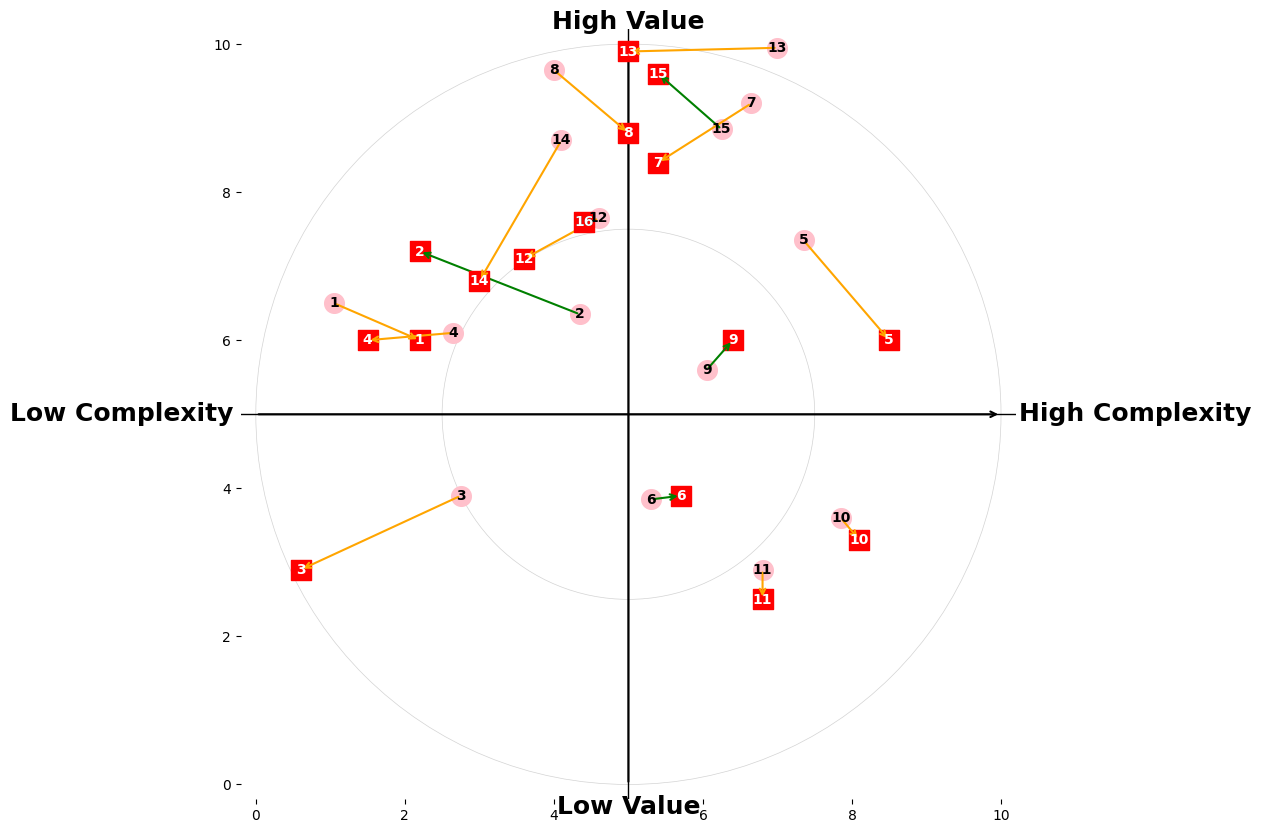

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define groups, colors, and average color
group_colors = {"Group 1": "blue", "Group 2": "green", "Group 3": "red"}
average_color = "pink"  # Color to show average of Group 1 & Group 2
increase_arrow_color = "green"  # Arrow color for increase in y-axis value
decrease_arrow_color = "orange"  # Arrow color for decrease in y-axis value
group_names = list(group_colors.keys())
num_solutions = 16  # Fixed number of solutions, labeled 1 to 16

def calculate_group_average(all_groups_points, groups_to_average):
    """Calculate the average complexity and value for each solution across specific groups."""
    average_points = {}
    point_counts = {i: 0 for i in range(1, num_solutions + 1)}
    
    for group in groups_to_average:
        group_points = all_groups_points[group]
        for label, coords in group_points.items():
            x, y = coords
            if label not in average_points:
                average_points[label] = [0, 0]
            average_points[label][0] += x
            average_points[label][1] += y
            point_counts[label] += 1
    
    # Calculate the average for each solution
    for label, coords in average_points.items():
        count = point_counts[label]
        average_points[label] = [coord / count for coord in coords]
    
    return average_points

def plot_comparison(csv_file, group1_2_average_groups=["Group 1", "Group 2"], comparison_group="Group 3"):
    # Load data from CSV file
    df = pd.read_csv(csv_file)
    
    # Convert the DataFrame to the required nested dictionary format
    all_groups_points = {
        group: {
            int(solution): [row["Complexity"], row["Value"]]
            for solution, row in group_df.groupby("Solution").first().iterrows()
        }
        for group, group_df in df.groupby("Group")
    }
    
    # Calculate the average for Group 1 and Group 2
    group1_2_average = calculate_group_average(all_groups_points, group1_2_average_groups)
    
    # Set up the plot with a larger figure size
    fig, ax = plt.subplots(figsize=(10, 10))  # Increased size for a larger view
    ax.set_xlim(-0.2, 10.2)
    ax.set_ylim(-0.2, 10.2)

    # Remove the box frame around the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Move x and y axes to the center
    ax.axhline(5, color='black', linewidth=1, zorder=1)
    ax.axvline(5, color='black', linewidth=1, zorder=1)

    # Add arrows to the axes
    ax.annotate('', xy=(10, 5), xytext=(0, 5), arrowprops=dict(arrowstyle="->", color='black', lw=1.5), zorder=1)
    ax.annotate('', xy=(5, 10), xytext=(5, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1.5), zorder=1)

    # Label axes with 'High' and 'Low' indicators
    ax.text(11.8, 5, 'High Complexity', ha='center', va='center', fontsize=18, fontweight='bold')
    ax.text(-1.8, 5, 'Low Complexity', ha='center', va='center', fontsize=18, fontweight='bold')
    ax.text(5, 10.3, 'High Value', ha='center', va='center', fontsize=18, fontweight='bold')
    ax.text(5, -0.3, 'Low Value', ha='center', va='center', fontsize=18, fontweight='bold')

    # Draw concentric circles for radial axes
    for radius in [2.5, 5]:
        circle = plt.Circle((5, 5), radius, color='lightgray', fill=False, linewidth=0.5, zorder=0)
        ax.add_artist(circle)

    # Plot the average of Group 1 and Group 2 for each solution
    for label, (x_avg, y_avg) in group1_2_average.items():
        ax.scatter(x_avg, y_avg, color=average_color, s=200, marker='o', zorder=2)
        ax.text(x_avg, y_avg, str(label), color='black', fontsize=10, ha='center', va='center', zorder=3, fontweight="bold")

    # Plot Group 3's points and draw arrows showing the change
    for label, (x_avg, y_avg) in group1_2_average.items():
        if label in all_groups_points[comparison_group]:
            x3, y3 = all_groups_points[comparison_group][label]
            # Plot Group 3's points
            ax.scatter(x3, y3, color=group_colors[comparison_group], s=200, marker='s', zorder=2)
            ax.text(x3, y3, str(label), color='white', fontsize=10, ha='center', va='center', zorder=3, fontweight="bold")
            
            # Determine arrow color based on change in y-axis (value)
            arrow_color = increase_arrow_color if y3 > y_avg else decrease_arrow_color
            
            # Draw arrow from average(Group 1 & Group 2) to Group 3
            ax.annotate('', xy=(x3, y3), xytext=(x_avg, y_avg),
                        arrowprops=dict(arrowstyle="->", color=arrow_color, lw=1.5), zorder=2)

    plt.show()

# Example usage
plot_comparison("../group_data.csv", group1_2_average_groups=["Group 1", "Group 2"], comparison_group="Group 3")
